<IPython.core.display.Javascript object>


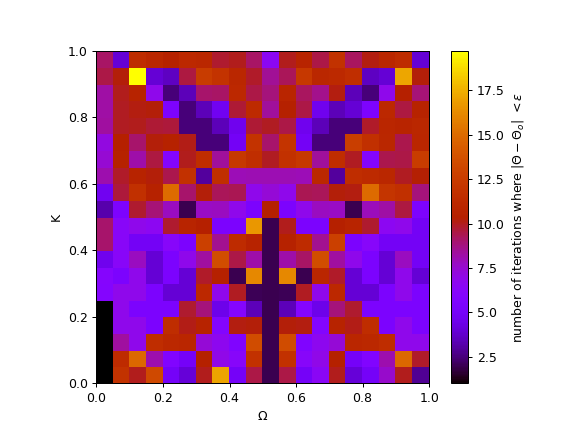

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) %1

def get_theta_o(theta_o, omega, K):
    theta_start = []
    theta_start.append(theta_o)
    for i in range(100):
        theta_start.append(circle(theta_start[-1], omega, K))
    return theta_start

def wind(theta_o, omega, K):
    e = .05
    nn = []
    theta_start = get_theta_o(theta_o, omega,K)
    for i in range(len(theta_start)):
        theta = theta_start[i]
        theta_curr = theta + 2*e
        n = 0
        while abs(theta_curr  - theta_start[i]) > e and n < 150:
            theta = circle(theta, omega, K)
            theta_curr = theta
            n += 1
        nn.append(n)
    #print('---------')
    return np.mean(nn)

def getwind(OMEGA, K, W, theta_o):
    for i in range(len(K)):
        for j in range(len(K[0])):
            k = K[i][j]
            omega = OMEGA[i][j]
            W[i][j] = wind(theta_o, omega, k)
            #print('done')
    return W            
            
theta_o = .5

dx = .05
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
OMEGA, K = np.meshgrid(x,y)
W = OMEGA*0.0 
W = getwind(OMEGA, K, W, theta_o)



cc = plt.pcolormesh(OMEGA,K,W, cmap ='gnuplot')
plt.axis('scaled')

cbar = plt.colorbar()
plt.xlabel('$\Omega$')
plt.ylabel('K')
cbar.set_label('number of iterations where |$\Theta - \Theta_o$| $< \epsilon$')


In [4]:
print(100//6)


16
